In [185]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import folium
import geopandas as gpd
data_2019 = pd.read_csv('MTS_AA_2019_3mesi.csv', parse_dates=True)
data_2020 = pd.read_csv('MTS_2020.csv', parse_dates=True)

print('2019 ', data_2019.shape)
print('2020 ', data_2020.shape)
diff = data_2019.shape[0] - data_2020.shape[0]
print('Differenza tra i due periodi in termini di osservazioni = ', diff)

2019  (22117, 13)
2020  (20853, 13)
Differenza tra i due periodi in termini di osservazioni =  1264


In [186]:
# '%Y-%m-%d' 

data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22117 entries, 0 to 22116
Data columns (total 13 columns):
AnnoMese                       22117 non-null object
Postazione                     22117 non-null int64
Giorno                         22117 non-null object
N Giorno Settimana             22117 non-null int64
Strada                         22117 non-null object
Transiti - Totale              20320 non-null float64
Transiti - Non Classificato    20320 non-null float64
Transiti - Leggeri             20320 non-null float64
Transiti - Pesanti             20320 non-null float64
Transiti - Diurno              20320 non-null float64
Transiti - Notturno            20320 non-null float64
Transiti - Feriali             20320 non-null float64
Transiti - Festivi             20320 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 2.2+ MB


### Aggrega dati per entrambi i periodi e confronta dati per ogni variabile di aggregazione

In [187]:
print('- Il 2020 è un anno bisestile, da qui la differenza tra i due periodi 90 vs 91 giorni')
abd2019 = data_2019.groupby(by = ['Giorno'])
print('  Giorni 2019 = ',len(abd2019))
abd2020 = data_2020.groupby(by = ['Giorno'])
print('  Giorni 2020 = ',len(abd2020))

print('- Entrambi i periodi hanno osservazioni per ogni giorno della settimana cioè 7')
abdw2019 = data_2019.groupby(by = ['N Giorno Settimana'])
print('  Giorni della settimana in 2019', len(abdw2019))
abdw2020 = data_2020.groupby(by = ['N Giorno Settimana'])
print('  Giorni della settimana in 2020', len(abdw2020))

print('- I periodi hanno osservazioni su un numero diverso di strade. Il 2019 ha più strade osservate')
abs2019 = data_2019.groupby(by = ['Strada'])
print('  Strade in 2019', len(abs2019))
abs2020 = data_2020.groupby(by = ['Strada'])
print('  Strade in 2020', len(abs2020))

print('- I periodi hanno lo stesso numero di mesi.')
abm2019 = data_2019.groupby(by = ['AnnoMese'])
print('  Mesi in 2019', len(abm2019))
abm2020 = data_2020.groupby(by = ['AnnoMese'])
print('  Mesi in 2020', len(abm2020))

print('- I due periodi contengono osservazioni da un numero di postazioni uguale! ')
abp2019 = data_2019.groupby(by = ['Postazione'])
print('  Postazioni in 2019', len(abp2019))
abp2020 = data_2019.groupby(by = ['Postazione'])
print('  Postazioni in 2020', len(abp2020))

- Il 2020 è un anno bisestile, da qui la differenza tra i due periodi 90 vs 91 giorni
  Giorni 2019 =  90
  Giorni 2020 =  91
- Entrambi i periodi hanno osservazioni per ogni giorno della settimana cioè 7
  Giorni della settimana in 2019 7
  Giorni della settimana in 2020 7
- I periodi hanno osservazioni su un numero diverso di strade. Il 2019 ha più strade osservate
  Strade in 2019 266
  Strade in 2020 246
- I periodi hanno lo stesso numero di mesi.
  Mesi in 2019 3
  Mesi in 2020 3
- I due periodi contengono osservazioni da un numero di postazioni uguale! 
  Postazioni in 2019 266
  Postazioni in 2020 266


### Confronto mezzi leggeri su ogni strada.

Asse viario Modena-Sassuolo tra Modena e Baggiovara - Mezzi Leggeri


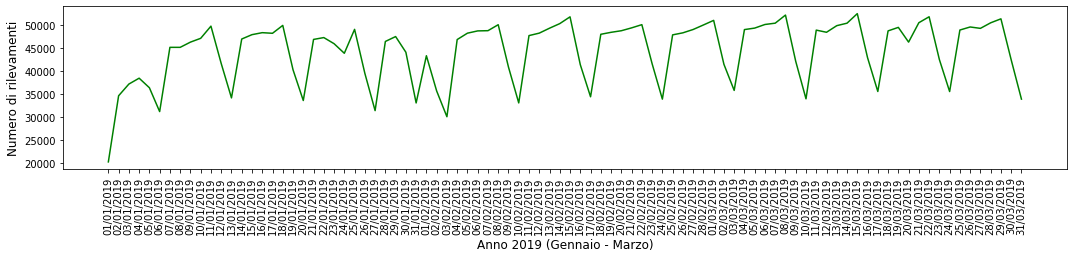

NSA 313 - Prosecuzione tangenziale di Bologna complanare sud alla A 14 nel tratto San Lazzaro/Idice - Mezzi Leggeri


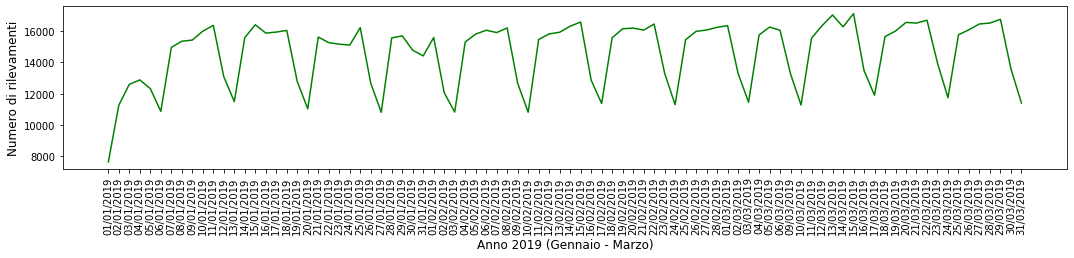

Piazzale Milano (ex SS 9) c/o ponte fiume Po - Mezzi Leggeri


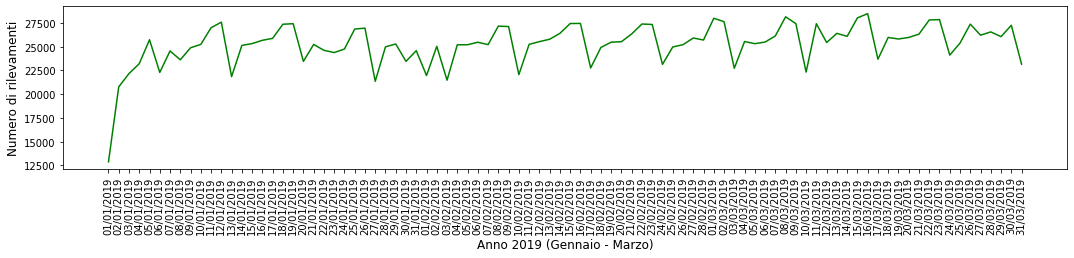

SP 1 da Villafranca di Forlì al confine provinciale - Mezzi Leggeri


In [191]:
counter = 0
for index, strada in abs2019:
    print(index+str(' - Mezzi Leggeri'))
    counter += 1
    if counter > 3 : break
    strada = strada.fillna(method='ffill')
    strada = strada.set_index(['Giorno'])
    plt.figure(figsize = (18, 3))
    plt.plot(strada['Transiti - Leggeri'], color = "green")
    plt.xlabel('Anno 2019 (Gennaio - Marzo)', fontsize=12)
    plt.ylabel('Numero di rilevamenti',  fontsize=12)
    plt.xticks(rotation='vertical', fontsize=10)
    
    plt.show()

Asse viario Modena-Sassuolo tra Modena e Baggiovara - Mezzi Leggeri


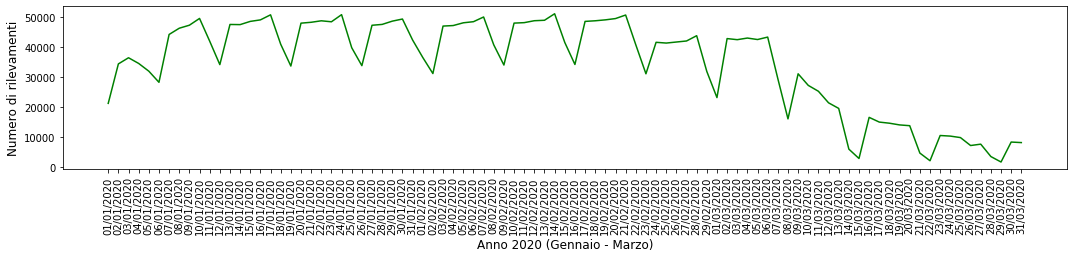

NSA 313 - Prosecuzione tangenziale di Bologna complanare sud alla A 14 nel tratto San Lazzaro/Idice - Mezzi Leggeri


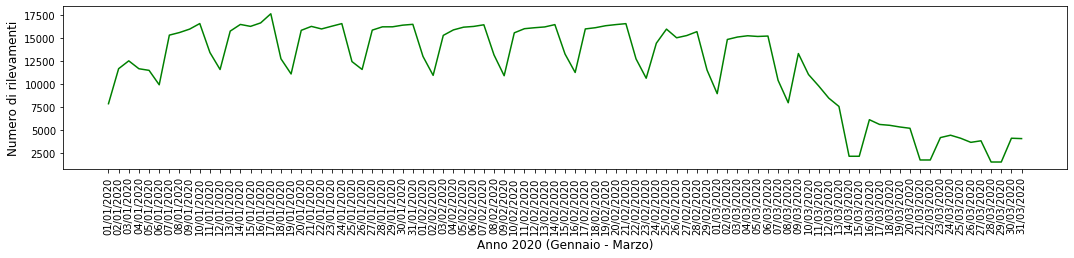

Piazzale Milano (ex SS 9) c/o ponte fiume Po - Mezzi Leggeri


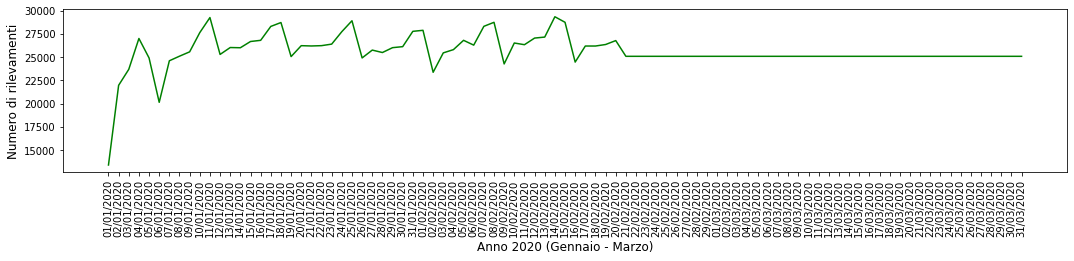

SP 1 da Villafranca di Forlì al confine provinciale - Mezzi Leggeri


In [192]:
counter = 0
for index, strada in abs2020:
    print(index+str(" - Mezzi Leggeri"))
    counter += 1
    if counter > 3 : break
    strada = strada.fillna(method='ffill')
    strada = strada.set_index(['Giorno'])
    plt.figure(figsize = (18, 3))
    plt.plot(strada['Transiti - Leggeri'], color = "green")
    plt.xlabel('Anno 2020 (Gennaio - Marzo)', fontsize=12)
    plt.ylabel('Numero di rilevamenti',  fontsize=12)
    plt.xticks(rotation='vertical', fontsize=10)
    
    plt.show()

### Confronto sui mezzi pesanti

Asse viario Modena-Sassuolo tra Modena e Baggiovara - Mezzi Pesanti


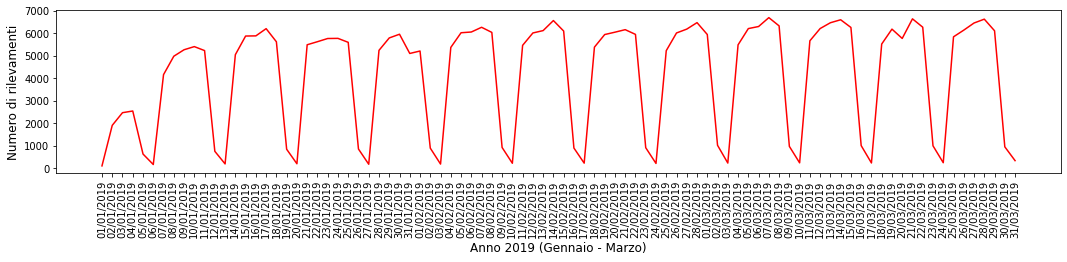

NSA 313 - Prosecuzione tangenziale di Bologna complanare sud alla A 14 nel tratto San Lazzaro/Idice - Mezzi Pesanti


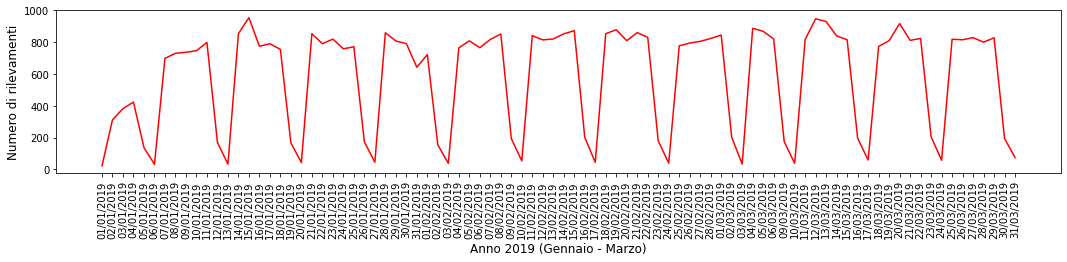

Piazzale Milano (ex SS 9) c/o ponte fiume Po - Mezzi Pesanti


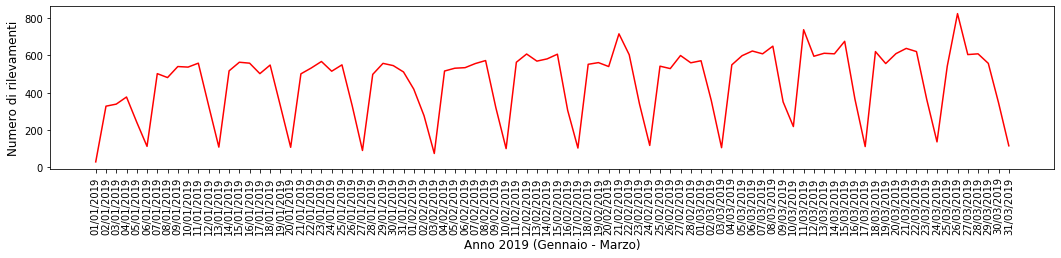

SP 1 da Villafranca di Forlì al confine provinciale - Mezzi Pesanti


In [193]:
counter = 0
for index, strada in abs2019:
    print(index+str(' - Mezzi Pesanti'))
    counter += 1
    if counter > 3 : break
    strada = strada.fillna(method='ffill')
    strada = strada.set_index(['Giorno'])
    plt.figure(figsize = (18, 3))
    plt.plot(strada['Transiti - Pesanti'], color = "red")
    plt.xlabel('Anno 2019 (Gennaio - Marzo)', fontsize=12)
    plt.ylabel('Numero di rilevamenti',  fontsize=12)
    plt.xticks(rotation='vertical', fontsize=10)
    
    plt.show()

Asse viario Modena-Sassuolo tra Modena e Baggiovara - Mezzi Pesanti


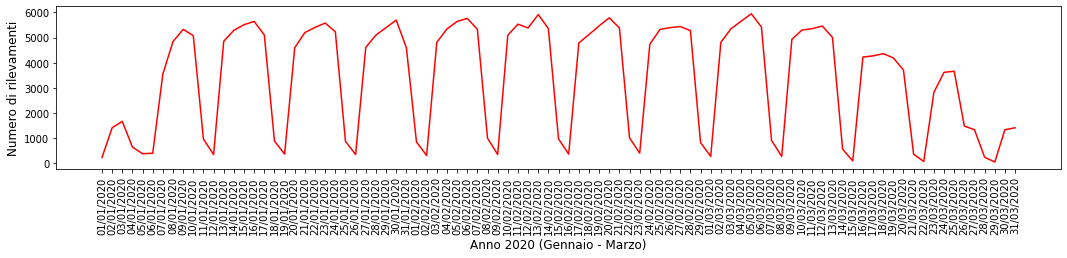

NSA 313 - Prosecuzione tangenziale di Bologna complanare sud alla A 14 nel tratto San Lazzaro/Idice - Mezzi Pesanti


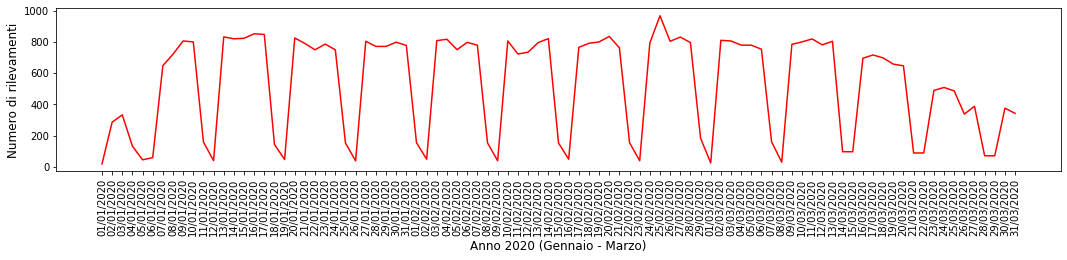

Piazzale Milano (ex SS 9) c/o ponte fiume Po - Mezzi Pesanti


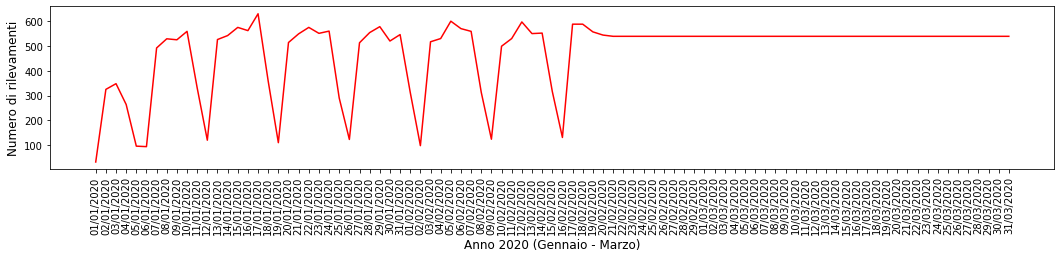

SP 1 da Villafranca di Forlì al confine provinciale - Mezzi Pesanti


In [196]:
counter = 0
for index, strada in abs2020:
    print(index+str(' - Mezzi Pesanti'))
    counter += 1
    if counter > 3 : break
    strada = strada.fillna(method='ffill')
    strada = strada.set_index(['Giorno'])
    plt.figure(figsize = (18, 3))
    plt.plot(strada['Transiti - Pesanti'], color = "red")
    plt.xlabel('Anno 2020 (Gennaio - Marzo)', fontsize=12)
    plt.ylabel('Numero di rilevamenti',  fontsize=12)
    plt.xticks(rotation='vertical', fontsize=10)
    
    plt.show()

### Confronto 19-20 su statistiche generali e serie temporali 

In [170]:
counter = 0
tra_leggero19 = {}
tra_pesante19 = {}
tra_totale19 = {}
tra_feriali19 = {}
tra_festivi19 = {}

for index, day in abd2019:
    
    day = day.fillna(method='ffill')

    somma_tot = day['Transiti - Totale'].sum()
    somma_pesante = day['Transiti - Pesanti'].sum()
    somma_leggero = day['Transiti - Leggeri'].sum()
    
    somma_feriali = day['Transiti - Feriali'].sum()
    somma_festivi = day['Transiti - Festivi'].sum()
    
    tra_leggero19[index] = somma_leggero
    tra_pesante19[index] = somma_pesante
    tra_totale19[index] = somma_tot  
    
    tra_feriali19[index] = somma_feriali
    tra_festivi19[index] = somma_festivi
    
counter = 0
tra_leggero20 = {}
tra_pesante20 = {}
tra_totale20 = {}
tra_feriali20 = {}
tra_festivi20 = {}

for index, day in abd2020:
    
    day = day.fillna(method='ffill')

    somma_tot = day['Transiti - Totale'].sum()
    somma_pesante = day['Transiti - Pesanti'].sum()
    somma_leggero = day['Transiti - Leggeri'].sum()
    
    somma_feriali = day['Transiti - Feriali'].sum()
    somma_festivi = day['Transiti - Festivi'].sum()
    
    tra_leggero20[index] = somma_leggero
    tra_pesante20[index] = somma_pesante
    tra_totale20[index] = somma_tot  
    
    tra_feriali20[index] = somma_feriali
    tra_festivi20[index] = somma_festivi    

In [171]:
d4v_leg19 = pd.DataFrame(tra_leggero19.items(), index=None, columns=['Date', 'Traffic'])  
d4v_pes19 = pd.DataFrame(tra_pesante19.items(), index=None, columns=['Date', 'Traffic'])  
d4v_tot19 = pd.DataFrame(tra_totale19.items(), index=None, columns=['Date', 'Traffic'])  
d4v_fer19 = pd.DataFrame(tra_feriali19.items(), index=None, columns=['Date', 'Traffic'])  
d4v_fes19 = pd.DataFrame(tra_festivi19.items(), index=None, columns=['Date', 'Traffic']) 

In [172]:
d4v_leg20 = pd.DataFrame(tra_leggero20.items(), index=None, columns=['Date', 'Traffic'])  
d4v_pes20 = pd.DataFrame(tra_pesante20.items(), index=None, columns=['Date', 'Traffic'])  
d4v_tot20 = pd.DataFrame(tra_totale20.items(), index=None, columns=['Date', 'Traffic'])  
d4v_fer20 = pd.DataFrame(tra_feriali20.items(), index=None, columns=['Date', 'Traffic'])  
d4v_fes20 = pd.DataFrame(tra_festivi20.items(), index=None, columns=['Date', 'Traffic']) 

In [173]:
'''d4v_leg19['Date'] = pd.to_datetime(d4v_leg19['Date'])
d4v_leg19.sort_values(by="Date")
d4v_leg19 = d4v_leg19.set_index('Date')

d4v_pes19['Date'] = pd.to_datetime(d4v_pes19['Date'])
d4v_pes19.sort_values(by="Date")
d4v_pes19 = d4v_pes19.set_index('Date')

d4v_tot19['Date'] = pd.to_datetime(d4v_tot19['Date'])
d4v_tot19.sort_values(by="Date")
d4v_tot19 = d4v_tot19.set_index('Date')

d4v_fer19['Date'] = pd.to_datetime(d4v_fer19['Date'])
d4v_fer19.sort_values(by="Date")
d4v_fer19 = d4v_fer19.set_index('Date')

d4v_fes19['Date'] = pd.to_datetime(d4v_fes19['Date'])
d4v_fes19.sort_values(by="Date")
d4v_fes19 = d4v_fes19.set_index('Date')
'''

'd4v_leg19[\'Date\'] = pd.to_datetime(d4v_leg19[\'Date\'])\nd4v_leg19.sort_values(by="Date")\nd4v_leg19 = d4v_leg19.set_index(\'Date\')\n\nd4v_pes19[\'Date\'] = pd.to_datetime(d4v_pes19[\'Date\'])\nd4v_pes19.sort_values(by="Date")\nd4v_pes19 = d4v_pes19.set_index(\'Date\')\n\nd4v_tot19[\'Date\'] = pd.to_datetime(d4v_tot19[\'Date\'])\nd4v_tot19.sort_values(by="Date")\nd4v_tot19 = d4v_tot19.set_index(\'Date\')\n\nd4v_fer19[\'Date\'] = pd.to_datetime(d4v_fer19[\'Date\'])\nd4v_fer19.sort_values(by="Date")\nd4v_fer19 = d4v_fer19.set_index(\'Date\')\n\nd4v_fes19[\'Date\'] = pd.to_datetime(d4v_fes19[\'Date\'])\nd4v_fes19.sort_values(by="Date")\nd4v_fes19 = d4v_fes19.set_index(\'Date\')\n'

In [174]:
'''d4v_leg20['Date'] = pd.to_datetime(d4v_leg20['Date'])
d4v_leg20.sort_values(by="Date")
d4v_leg20 = d4v_leg20.set_index('Date')

d4v_pes20['Date'] = pd.to_datetime(d4v_pes20['Date'])
d4v_pes20.sort_values(by="Date")
d4v_pes20 = d4v_pes20.set_index('Date')

d4v_tot20['Date'] = pd.to_datetime(d4v_tot20['Date'])
d4v_tot20.sort_values(by="Date")
d4v_tot20 = d4v_tot20.set_index('Date')

d4v_fer20['Date'] = pd.to_datetime(d4v_fer20['Date'])
d4v_fer20.sort_values(by="Date")
d4v_fer20 = d4v_fer20.set_index('Date')

d4v_fes20['Date'] = pd.to_datetime(d4v_fes20['Date'])
d4v_fes20.sort_values(by="Date")
d4v_fes20 = d4v_fes20.set_index('Date')
'''

'd4v_leg20[\'Date\'] = pd.to_datetime(d4v_leg20[\'Date\'])\nd4v_leg20.sort_values(by="Date")\nd4v_leg20 = d4v_leg20.set_index(\'Date\')\n\nd4v_pes20[\'Date\'] = pd.to_datetime(d4v_pes20[\'Date\'])\nd4v_pes20.sort_values(by="Date")\nd4v_pes20 = d4v_pes20.set_index(\'Date\')\n\nd4v_tot20[\'Date\'] = pd.to_datetime(d4v_tot20[\'Date\'])\nd4v_tot20.sort_values(by="Date")\nd4v_tot20 = d4v_tot20.set_index(\'Date\')\n\nd4v_fer20[\'Date\'] = pd.to_datetime(d4v_fer20[\'Date\'])\nd4v_fer20.sort_values(by="Date")\nd4v_fer20 = d4v_fer20.set_index(\'Date\')\n\nd4v_fes20[\'Date\'] = pd.to_datetime(d4v_fes20[\'Date\'])\nd4v_fes20.sort_values(by="Date")\nd4v_fes20 = d4v_fes20.set_index(\'Date\')\n'

### Confronto tra i due periodi secondo la variabile di traffico totale

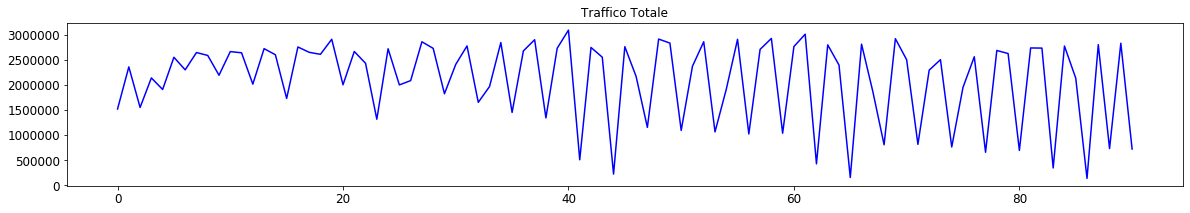

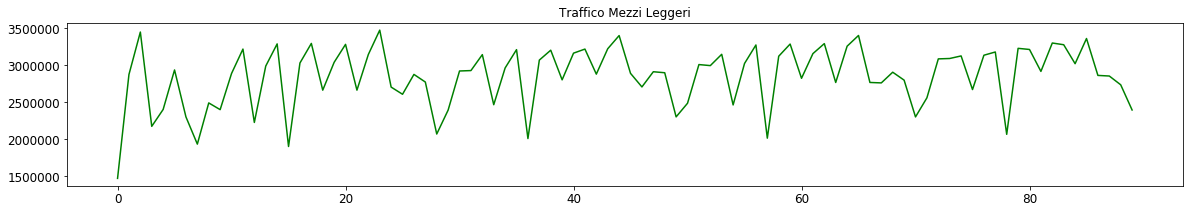

In [164]:
plt.figure(figsize = (20, 3))
plt.title('Traffico Totale')
plt.plot(d4v_tot20['Traffic'], color = "blue")
plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks( fontsize=12)
plt.show()

plt.figure(figsize = (20, 3))
plt.title('Traffico Mezzi Leggeri')
plt.plot(d4v_tot19['Traffic'], color = "green")
plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks( fontsize=12)
plt.show()


### Confronto tra i due periodi secondo la variabile di traffico di mezzi leggeri

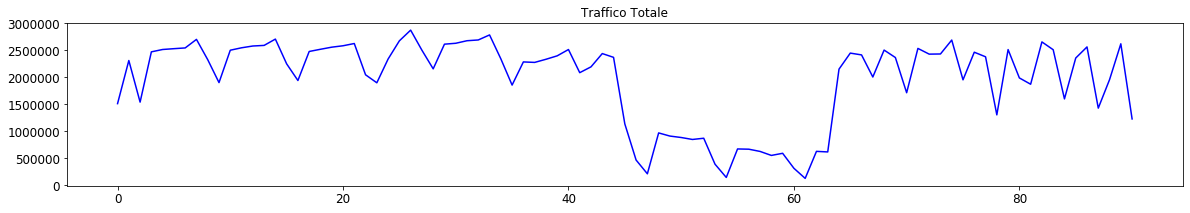

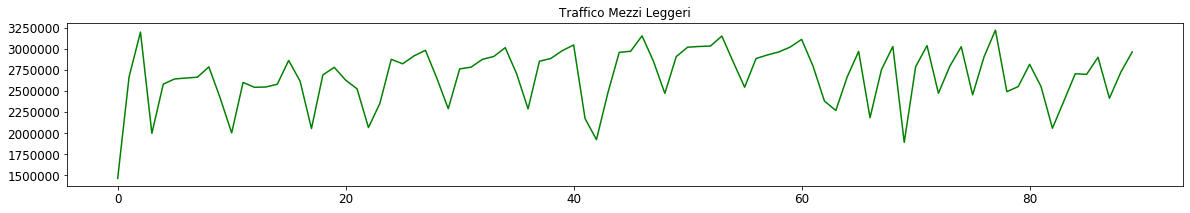

In [116]:
plt.figure(figsize = (20, 3))
plt.title('Traffico Totale')
plt.plot(d4v_leg20['Traffic'], color = "blue")
plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks( fontsize=12)
plt.show()

plt.figure(figsize = (20, 3))
plt.title('Traffico Mezzi Leggeri')
plt.plot(d4v_leg19['Traffic'], color = "green")
plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks( fontsize=12)
plt.show()